### 목표
 - 특성변수 (설명변수, 독립변수)를 활용하여 회귀 예측을 해보자
 - 특성공학 중에서 특성곱을 통해 성능 개선해보자

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 데이터 불러오기
from sklearn.datasets import load_boston

In [2]:
import warnings
warnings.filterwarnings(action = 'ignore')

boston = load_boston() # 번치객체 - 사용시 딕셔너리 사용

### 데이터 살펴보기

#### 설명변수 (원인: 예측값을 설명할 수 있는 변수)
CRIM: 범죄율  
INDUS: 비소매상업지역 면접 비율  
NOX: 일산화질소 농도  
RM : 주택당 방 수  
LSTAT: 인구 중 하위 계층 비율  
B: 인구 중 흑인 비율  
PTRATIO: 학생/교사 비율  
ZN: 25,000 평방피트를 초과 거주지역 비율  
CHAS : 찰스강의 경계에 위치한 경우는 1, 아니면 0  
AGE : 1940년 이전에 건축된 주택의 비율  
DIS: 직업센터의 거리  
TAX: 재산세율  
#### 반응 변수(결과: 예측하고자 하는 값 )
MEDV: 주택가격

In [3]:
# 키값
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [4]:
# 문제 데이터 확인
boston['data'] # bostion.data 도 됨

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [5]:
# 특성 이름 확인
boston['feature_names'] # boston.feature_names 도 됨

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
print(boston.DESCR) # DESCR = 설명 묘사

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
# 답 데이터 확인
boston.target   # boston['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [8]:
# 답 이름 확인
boston['filename']

'boston_house_prices.csv'

### 데이터 전처리
- 분석편리 : 넘파이 배열 -> 데이터프레임
- X : 독립변수, 예측변수, 입력변수, 설명변수
- y : 종속변수, 반응변수, 출력변수

In [9]:
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.Series(boston.target)

In [10]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

- train, test set 분할

In [12]:
# 7:3, 랜덤고정값 0
# train_test_split
# 문제 -> X_train, X_test
# 답 -> y_train, y_test
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y,
                                                test_size = 0.3 ,
                                                random_state = 0)
print('훈련문제:', X_train.shape)
print('훈련답:', y_train.shape)
print('테스트문제', X_test.shape)
print('테스트답:', y_test.shape)

훈련문제: (354, 13)
훈련답: (354,)
테스트문제 (152, 13)
테스트답: (152,)


#### LinearRegression

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [14]:
# 모델 객체 생성
linear_model = LinearRegression()
# 모델 학습
linear_model.fit(X_train,y_train)
# 모델 예측해서 pre 변수에 담아두기
pre = linear_model.predict(X_test)
pre

array([24.9357079 , 23.75163164, 29.32638296, 11.97534566, 21.37272478,
       19.19148525, 20.5717479 , 21.21154015, 19.04572003, 20.35463238,
        5.44119126, 16.93688709, 17.15482272,  5.3928209 , 40.20270696,
       32.31327348, 22.46213268, 36.50124666, 31.03737014, 23.17124551,
       24.74815321, 24.49939403, 20.6595791 , 30.4547583 , 22.32487164,
       10.18932894, 17.44286422, 18.26103077, 35.63299326, 20.81960303,
       18.27218007, 17.72047628, 19.33772473, 23.62254823, 28.97766856,
       19.45036239, 11.13170639, 24.81843595, 18.05294835, 15.59712226,
       26.21043403, 20.81140432, 22.17349382, 15.48367365, 22.62261604,
       24.88561528, 19.74754478, 23.0465628 ,  9.84579105, 24.36378793,
       21.47849008, 17.62118176, 24.39160873, 29.95102691, 13.57219422,
       21.53645439, 20.53306273, 15.03433182, 14.3232289 , 22.11929299,
       17.07321915, 21.54141094, 32.96766968, 31.371599  , 17.7860591 ,
       32.75069556, 18.74795323, 19.21428022, 19.41970047, 23.08

In [15]:
# 교차검증 통해 일반화 성능 확인하기
result = cross_val_score(linear_model, X_train, y_train, cv = 5)
result

# 어떤 테스트가 들어와도 비슷하게 성능이 높아야함
# 2번째 들어왔을때 58로 현저히 떨어지는 것을 확인 -> 일반화 x
# 다른 성능도 높지 않음

array([0.7246982 , 0.58082515, 0.77515092, 0.72161474, 0.78935797])

#### 회귀 성능 지표
- 여러 머신러닝 모델들을 사용했을때 성능 지표를 보고 모델을 비교하게 되기 때문에 정량적인 지표가 꼭 필요함
  - mse : 평균제곱오차
  - rmse : 평균제곱 오차에 루트를 씌운것
  - mae : 오차를 절댓값으로 변환해서 평균한 것
  - r2 : 분산 기반 예측 성능 평가,실제값의 분산과 예측값의 분산을 비교

In [16]:
from sklearn.metrics import mean_squared_error # mse 평균제곱 오차
from sklearn.metrics import mean_absolute_error # mae 평균절대 오차
from sklearn.metrics import r2_score # 결정계수, R-Squared

In [17]:
# 평균 제곱 오차
mean_squared_error(y_test, pre)

27.195965766883234

In [18]:
# 제곱근 평균 제곱 오차
np.sqrt(mean_squared_error(y_test, pre))

5.214975145375406

In [19]:
# 평균 절대 오차
mean_absolute_error(y_test, pre)

3.609904060381808

In [20]:
# 나의 모델이 데이터를 잘 설명하고 있는가?
# 쉽게 파악하기 위해서 r2_score
r2_score(y_test, pre) # 67% 만큼 데이트를 표현하고 있음

0.6733825506400193

#### 결정계수
- 추정한 선형 모형이 주어진 자료에 적합한 정도를 재는 척도
- r2 는 0~1 사이로 결과값이 출력
- r2 값이 1이면 현재 가지고 있는 x변수로 부터 y값을 100% 설명 (맞춤)했다는 의미, 회귀직선위에 모든 관측치가 있음
- r2 값이 0이면 현재 가지고 있는 x변수로 부터 y값을 0% 설명했다는 의미, 선형모형이 데이터를 설명하는데 전혀 도움이 되지 않음

In [21]:
linear_model.score(X_test, y_test) # r2.score 기본값

0.6733825506400193

In [22]:
# train 확인해보기
linear_model.score(X_train, y_train)

0.7645451026942549

In [23]:
# 현재 선형모델은 성능이 좋지 못함,
# linear_model 같은 경우 과대적합 또는 과소적합을 제어하는 
# 키워드가 없기 때문에 데이터 측면에서 변경해줄 필요가 있음

#### 특성확장
- 모델의 성능을 향상시키기
- 주택가격에 연관성이 있는 특성을 찾아 확장해보자

In [24]:
# copy 함수 : 데이터를 복사할때 사용
# a = b 는 원본 데이터가 변하면 똑같이 변하는 얕은 복사
# c = b.copy()는 복사 당시의 데이터 상태를 복사하게 되는 깊은 복사
b = pd.Series([1,2,3,4])
a = b # 얕은복사
c = b.copy() # 깊은복사 - 원본상태를 복사
b[0] = 11 # 0번째 자리 요소값 변경
display(b)
display(a)
display(c)

0    11
1     2
2     3
3     4
dtype: int64

0    11
1     2
2     3
3     4
dtype: int64

0    1
1    2
2    3
3    4
dtype: int64

In [25]:
# 상관 관계를 확인하기 위해 문제와 답 데이터 병합
boston_copy = X_train.copy() # 복사
boston_copy['PRICE'] = y_train
boston_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 141 to 172
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     354 non-null    float64
 1   ZN       354 non-null    float64
 2   INDUS    354 non-null    float64
 3   CHAS     354 non-null    float64
 4   NOX      354 non-null    float64
 5   RM       354 non-null    float64
 6   AGE      354 non-null    float64
 7   DIS      354 non-null    float64
 8   RAD      354 non-null    float64
 9   TAX      354 non-null    float64
 10  PTRATIO  354 non-null    float64
 11  B        354 non-null    float64
 12  LSTAT    354 non-null    float64
 13  PRICE    354 non-null    float64
dtypes: float64(14)
memory usage: 41.5 KB


In [26]:
# price와 각 특성들의 상관관계 확인하기
boston_copy.corr()['PRICE'].abs().sort_values(ascending = False) # 내림차순 정렬

# 하위 계층의 비율 -1 상관계수 높음
# 주택당 방의 개수 -2 상관계수 높음

PRICE      1.000000
LSTAT      0.743289
RM         0.708978
PTRATIO    0.564733
INDUS      0.504361
TAX        0.481319
NOX        0.426690
AGE        0.390942
RAD        0.389533
CRIM       0.388182
ZN         0.386115
B          0.324437
DIS        0.245634
CHAS       0.162395
Name: PRICE, dtype: float64

- 상관 관계가 높은 특성에 대해 특성 특성확장(특성곱) 해보기

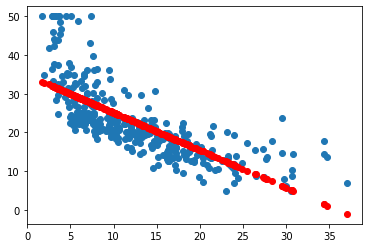

In [27]:
# 확장전 ) 먼저 lstat 특성만 가지고 학습시킨 후 예측을 어떻게 하는지 시각화
model = LinearRegression()
model.fit(X_train[['LSTAT']], y_train)
pre = model.predict(X_train[['LSTAT']])
pre

plt.scatter(X_train['LSTAT'], y_train)
plt.scatter(X_train['LSTAT'], pre,color = 'red')
plt.show()

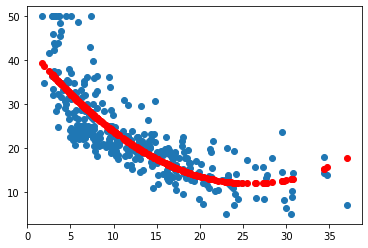

In [29]:
# 확장 후 ) 본래 LSTAT 특정과 확장한 LSTAT특성을 가지고 학습에 활용
# 예측을 어떻게 하게 되는지 시각화 해보자
X_train['LSTAT x LSTAT'] = X_train['LSTAT'] * X_train['LSTAT'] # 특성곱
model2 = LinearRegression()
model2.fit(X_train[['LSTAT','LSTAT x LSTAT']], y_train)
pre2 = model2.predict(X_train[['LSTAT','LSTAT x LSTAT']])

plt.scatter(X_train['LSTAT'],y_train)
plt.scatter(X_train['LSTAT'],pre2, color = 'red') # 예측값2
plt.show()

In [30]:
X_test['LSTAT x LSTAT'] = X_test['LSTAT'] * X_test['LSTAT'] # 특성곱

# 특성 확장한 데이터 추가하여 모델 학습 후 맨 처음 모델 r2와 비교하기
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.score(X_test, y_test) # r2_score 결정계수

0.6978697736472479

In [32]:
linear_model.score(X_train,y_train)

0.8224831400994939

In [33]:
# 선형 모델을 데이터가 많으면 많을 수록 학습이 잘 될 수 있음
# 특성확장(특성곱)을 통해 데이터 포인터들을 더 많이 인식하게 되면서
# 데이터에대해 잘 학습하고 있음을 보여줌

#### 다항회귀 이해: 독립변수의 단항식이 아닌 2차,3차 방정식과 같은 다항식으로 표현된 것을 다항회귀라고 함

<font color = 'red'> 주의) <br>
1. 다항회귀를 선형이 아닌 비선형 회귀로 혼동 할 수 있지만, 선형회귀라는 점을 기억하자  
2. 선형/비선형 회귀를 나누는 기준은 회귀 계수가 선형/비선형인가에 따른 것이지 독립변수의 선형/비선형에 따른 것이 아님

- rm 특성 확장해보기

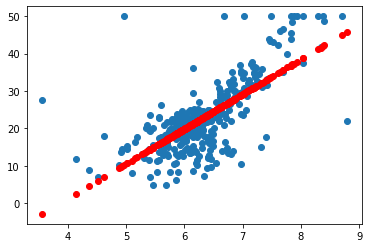

In [35]:
# 확장전)
model = LinearRegression()
model.fit(X_train[['RM']], y_train)
pre = model.predict(X_train[['RM']])
pre

plt.scatter(X_train['RM'], y_train)
plt.scatter(X_train['RM'], pre,color = 'red')
plt.show()

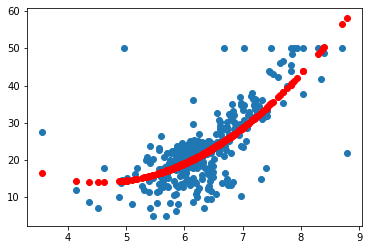

In [36]:
# 확장후)
X_train['RM x RM'] = X_train['RM'] * X_train['RM'] # 특성곱
model2 = LinearRegression()
model2.fit(X_train[['RM','RM x RM']], y_train)
pre2 = model2.predict(X_train[['RM','RM x RM']])

plt.scatter(X_train['RM'],y_train)
plt.scatter(X_train['RM'],pre2, color = 'red') # 예측값2
plt.show()

In [37]:
# 특성확장된 데이터 가지고 성능평가해보기
X_test['RM x RM'] = X_test['RM'] * X_test['RM'] # 특성곱

# 특성 확장한 데이터 추가하여 모델 학습 후 맨 처음 모델 r2와 비교하기
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_model.score(X_test, y_test) # r2_score 결정계수 74%

0.7460776611187947

- 모든 데이터 전체 특성확장해보기

In [38]:
# 2개의 특성이 확장 되어 있으니 삭제
X_train.drop(['LSTAT x LSTAT','RM x RM'], axis = 1, inplace = True)
X_test.drop(['LSTAT x LSTAT','RM x RM'], axis = 1, inplace = True)

In [39]:
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 141 to 172
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     354 non-null    float64
 1   ZN       354 non-null    float64
 2   INDUS    354 non-null    float64
 3   CHAS     354 non-null    float64
 4   NOX      354 non-null    float64
 5   RM       354 non-null    float64
 6   AGE      354 non-null    float64
 7   DIS      354 non-null    float64
 8   RAD      354 non-null    float64
 9   TAX      354 non-null    float64
 10  PTRATIO  354 non-null    float64
 11  B        354 non-null    float64
 12  LSTAT    354 non-null    float64
dtypes: float64(13)
memory usage: 38.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 329 to 5
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     152 non-null    float64
 1   ZN       152 non-null    float64
 2   INDUS    152 non-nu

In [40]:
# 데이터를 복사
extended_X_train = X_train.copy() # 깊은복사
extended_X_test = X_test.copy() # 깊은복사

In [42]:
# for - train 특성들 확장
for col1 in X_train.columns: # 13개 컬럼
    for col2 in X_train.columns : # 13개 컬럼
        extended_X_train[col1+'x'+col2] = X_train[col1]* X_train[col2]

In [43]:
extended_X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,LSTATxCHAS,LSTATxNOX,LSTATxRM,LSTATxAGE,LSTATxDIS,LSTATxRAD,LSTATxTAX,LSTATxPTRATIO,LSTATxB,LSTATxLSTAT
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,...,0.0,21.47184,172.70379,3441.000,49.529754,137.64,15037.17,729.492,13657.3290,1184.0481
272,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,...,0.0,3.58672,50.53874,453.751,30.282275,23.19,1723.79,143.778,3053.0408,59.7529
135,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,...,0.0,10.58304,107.44160,1665.472,35.797472,67.84,7411.52,359.552,6693.6032,287.6416
298,0.06466,70.0,2.24,0.0,0.400,6.345,20.1,7.8278,5.0,358.0,...,0.0,1.98800,31.53465,99.897,38.904166,24.85,1779.26,73.556,1830.1528,24.7009
122,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,...,0.0,10.41733,106.88073,1665.697,37.418117,35.86,3370.84,342.463,6779.1537,321.4849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,...,0.0,5.78782,67.01192,872.282,55.425714,58.70,3369.38,230.104,4591.8662,137.8276
192,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,...,0.0,1.25419,20.60086,75.481,18.597026,14.35,1142.26,43.624,1120.7063,8.2369
117,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,...,0.0,5.63410,62.01630,850.780,28.298220,61.80,4449.60,183.340,4063.4530,106.0900
47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,...,0.0,8.42240,113.36400,1607.400,106.960720,56.40,4380.40,336.520,7383.5120,353.4400


In [44]:
# for -test 특성 확장
for col1 in X_test.columns: # 13개 컬럼
    for col2 in X_test.columns : # 13개 컬럼
        extended_X_test[col1+'x'+col2] = X_test[col1]* X_test[col2]

In [45]:
extended_X_test.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       ...
       'LSTATxCHAS', 'LSTATxNOX', 'LSTATxRM', 'LSTATxAGE', 'LSTATxDIS',
       'LSTATxRAD', 'LSTATxTAX', 'LSTATxPTRATIO', 'LSTATxB', 'LSTATxLSTAT'],
      dtype='object', length=182)

In [46]:
extended_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 141 to 172
Columns: 182 entries, CRIM to LSTATxLSTAT
dtypes: float64(182)
memory usage: 506.1 KB


In [47]:
extended_X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 329 to 5
Columns: 182 entries, CRIM to LSTATxLSTAT
dtypes: float64(182)
memory usage: 217.3 KB


In [48]:
linear_model = LinearRegression()
linear_model.fit(extended_X_train, y_train)

LinearRegression()

In [49]:
# 성능확인
linear_model.score(extended_X_test, y_test) # 64%

0.6486839499829934

특성이 너무 많아져서 과대적합에 걸렸을 확률이 높음  
그래서 전보다 낮은 스코어를 보여주고 있음  
LinearRegression 모델은 이 상황을 제어해줄수있는 하이퍼 파라미터가 없음  
규제를 가할 수 있는 Ridge규제 모델을 적용해보자

#### Ridge 정규화 모델- 모델의 복잡도를 제어할 수 있는 모델

In [50]:
from sklearn.linear_model import Ridge

In [51]:
ridge_model = Ridge(alpha = 100) # alpha 규제의 정도를 설정

In [52]:
ridge_model.fit(extended_X_train, y_train)

Ridge(alpha=100)

In [54]:
# 스코어 확인하기 (결정계수)
ridge_model.score(extended_X_test,y_test) # 77% 결정계수

0.7767755128062308

#### Ridge vs Lasso 비교
- lasso(L1규제) : 가중치의 절대값의 합을 최소화하는 제약조건 
    - 가중치가 너무 작아지는 경우 상수값에 의해서 가중치가 0이 되어버림
- ridge(L2규제) : 가중치의 제곱합을 최소화하는 제약조건
    - 특정 가중치가 비이상적으로 커지는 상황을 방지, 전체적으로 가중치를 작아지게 하여 과적합을 방지하는 것

In [55]:
from sklearn.linear_model import Ridge,Lasso

In [59]:
alpha_list = [0.001, 0.01, 0.1, 10, 100, 1000]
ridge_coef_list = []
lasso_coef_list = []

for alpha in alpha_list :
    r_model = Ridge(alpha = alpha)
    l_model = Lasso(alpha = alpha)
    r_model.fit(X_train,y_train)
    l_model.fit(X_train,y_train)
    ridge_coef_list.append(r_model.coef_)
    lasso_coef_list.append(l_model.coef_)    

In [63]:
# Ridge 정규화 모델 가중치 변화 데이터프레임으로 확인
rd_df = pd.DataFrame(np.array(ridge_coef_list).T,
                     columns = alpha_list)
rd_df

,0.001,0.010,0.100,10.000,100.000,1000.000
0,-0.121304,-0.121251,-0.120763,-0.116008,-0.109848,-0.089402
1,0.044470,0.044497,0.044753,0.048609,0.053624,0.054174
2,0.011278,0.010711,0.005540,-0.047175,-0.052950,-0.035259
3,2.511254,2.511310,2.510884,1.785961,0.483850,0.071015
4,-16.215572,-16.075800,-14.800321,-1.540350,-0.163749,-0.006989
5,3.859184,3.860214,3.869280,3.620640,1.972206,0.431777
6,-0.010001,-0.010144,-0.011441,-0.021636,-0.005280,0.028926
7,-1.500067,-1.498261,-1.481782,-1.309680,-1.183078,-0.538181
8,0.242095,0.241661,0.237723,0.211507,0.253968,0.239244
9,-0.011073,-0.011082,-0.011165,-0.012664,-0.014718,-0.015490


In [65]:
# lasso 정규화 가중치 변동 데이터 프레임
ls_df = pd.DataFrame(np.array(lasso_coef_list).T,
                    columns = alpha_list,
                    index = X_train.columns)
ls_df # 특성선택을 함

,0.001,0.010,0.100,10.000,100.000,1000.000
CRIM,-0.121161,-0.119781,-0.113118,-0.000000,-0.000000,-0.0
ZN,0.044526,0.045093,0.047251,0.031050,0.000000,0.0
INDUS,0.009928,-0.001208,-0.039925,-0.000000,-0.000000,-0.0
CHAS,2.497490,2.371394,0.964789,0.000000,0.000000,0.0
NOX,-15.884229,-12.789549,-0.000000,0.000000,-0.000000,-0.0
RM,3.859429,3.863614,3.722896,0.000000,0.000000,0.0
AGE,-0.010292,-0.013035,-0.021431,0.000000,-0.000000,-0.0
DIS,-1.495377,-1.450155,-1.233704,-0.000000,0.000000,0.0
RAD,0.241125,0.232505,0.204690,0.000000,-0.000000,-0.0
TAX,-0.011097,-0.011366,-0.012944,-0.010997,-0.021888,-0.0
